# Final homework

*Akademia Leona Kozminskiego*
#### Descriptive Statistics


*Prof.* Katarzyna Piotrowska <br>
*Student* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis
7. Sample description
8. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
the method and interpretation of the results
9. The purpose of use descriptive statistics (sample description, the answer to research question, other)
10. Conclusions/discussion

## 1. Research question

* What is the impact of crops production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between Cereals, Roots and Tubers and Potatoes production and Nitrous Oxide (N2O) emissions in Poland during the period 1971 to 2018.

## 3. Variables definition

In [117]:
variables_defi = {"y": ["Nitrous Oxide emissions"], 
                  "x1": ["Cereals production"] ,
                  "x2": ["Roots and Tubers production"],
                  "x3": ["Potatoes production"]}
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid"))

╒═════════════════════════╤════════════════════╤═════════════════════════════╤═════════════════════╕
│ y                       │ x1                 │ x2                          │ x3                  │
╞═════════════════════════╪════════════════════╪═════════════════════════════╪═════════════════════╡
│ Nitrous Oxide emissions │ Cereals production │ Roots and Tubers production │ Potatoes production │
╘═════════════════════════╧════════════════════╧═════════════════════════════╧═════════════════════╛


## 4. Subject of study

Nitrous Oxide (N2O) emissions according to crops production.

## 5. Data collection procedure

### 5.1 Crop production data collection procedure

#### 5.1.1 Importing libraries

In [156]:
from tabulate import tabulate

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm 

import seaborn as sns
sns.set()


#### 5.1.2 Importing the crops dataset

The dataset was obtained from *data.world* which in turn, was taken from the Food and Agriculture Organization of the United Nations (FAO). Specifically, the crop production dataset was taken, which contains statistics of 173 farm products around the world. The original dataset was filtered using SQL by area code, in this case "173" that corresponds to Poland. <br>

In [119]:
data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

#### 5.1.3 Revealing the characteristics of the variables in the dataset.

In [120]:
data_crops.columns

Index(['area_code', 'area', 'item_code', 'item', 'element_code', 'element',
       'unit', 'y1971', 'y1972', 'y1973', 'y1974', 'y1975', 'y1976', 'y1977',
       'y1978', 'y1979', 'y1980', 'y1981', 'y1982', 'y1983', 'y1984', 'y1985',
       'y1986', 'y1987', 'y1988', 'y1989', 'y1990', 'y1991', 'y1992', 'y1993',
       'y1994', 'y1995', 'y1996', 'y1997', 'y1998', 'y1999', 'y2000', 'y2001',
       'y2002', 'y2003', 'y2004', 'y2005', 'y2006', 'y2007', 'y2008', 'y2009',
       'y2010', 'y2011', 'y2012', 'y2013', 'y2014', 'y2015', 'y2016', 'y2017',
       'y2018'],
      dtype='object')

In [121]:
data_crops_charact = ([["Variable", "Description"],
                        ['area_code', "173"], 
                        ['area', "Poland"], 
                        ['item_code', "Product code"], 
                        ['item', "Product name"], 
                        ['element_code',"Code of the element"], 
                        ['element',"Type of production: Production, area harvested, yield"], 
                        ['unit',"Unit of measurement: tonnes, Ha, Hg/Ha"], 
                        ['year',"Years (1961-2019)"]])

In [122]:
print(tabulate(data_crops_charact, headers= "firstrow", tablefmt='fancy_grid'))

╒══════════════╤═══════════════════════════════════════════════════════╕
│ Variable     │ Description                                           │
╞══════════════╪═══════════════════════════════════════════════════════╡
│ area_code    │ 173                                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ area         │ Poland                                                │
├──────────────┼───────────────────────────────────────────────────────┤
│ item_code    │ Product code                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ item         │ Product name                                          │
├──────────────┼───────────────────────────────────────────────────────┤
│ element_code │ Code of the element                                   │
├──────────────┼───────────────────────────────────────────────────────┤
│ element      │ Type of production: Production, ar

In [123]:
vars_crops_charact =    ([["Variable", "Type", "Level"],
                        ['area_code', "Integer", "Nominal"], 
                        ['area', "String", "Nominal"], 
                        ['item_code', "Integer", "Nominal"], 
                        ['item', "String", "Nominal"], 
                        ['element_code',"Integer", "Nominal"], 
                        ['element',"String", "Nominal"], 
                        ['unit',"String", "Nominal"], 
                        ['year',"String/Float", "Ratio"]])

In [124]:
print(tabulate(vars_crops_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════╕
│ Variable     │ Type         │ Level   │
╞══════════════╪══════════════╪═════════╡
│ area_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ area         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item_code    │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ item         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element_code │ Integer      │ Nominal │
├──────────────┼──────────────┼─────────┤
│ element      │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ unit         │ String       │ Nominal │
├──────────────┼──────────────┼─────────┤
│ year         │ String/Float │ Ratio   │
╘══════════════╧══════════════╧═════════╛


#### 5.1.4 Cleaning process of the "data_crops" dataset

##### 5.1.4.1 Checking for NAN values

In [125]:
data_crops.isna()

,area_code,area,item_code,item,element_code,element,unit,y1971,y1972,y1973,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
0,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
277,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
278,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
279,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### 5.1.4.2 Replacing NAN with 0

In [126]:
data_crops.replace(np.nan, 0)

,area_code,area,item_code,item,element_code,element,unit,y1971,y1972,y1973,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
0,173,Poland,221,"Almonds, with shell",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,173,Poland,221,"Almonds, with shell",5510,Production,tonnes,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,173,Poland,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,173,Poland,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,"3,400.00",0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,173,Poland,515,Apples,5312,Area harvested,ha,0.00,0.00,0.00,...,"173,607.00","170,443.00","183,526.00","194,680.00","193,439.00","176,335.00","180,399.00","177,203.00","176,352.00","166,150.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,173,Poland,1729,"Treenuts, Total",5419,Yield,hg/ha,0.00,0.00,0.00,...,"6,873.00","3,734.00","4,637.00","8,406.00","19,370.00","18,345.00","20,716.00","19,529.00","12,926.00","25,075.00"
277,173,Poland,1729,"Treenuts, Total",5510,Production,tonnes,0.00,0.00,0.00,...,"15,650.00","12,187.00","13,930.00","16,993.00","13,594.00","12,467.00","12,502.00","12,741.00","8,353.00","15,120.00"
278,173,Poland,1735,Vegetables Primary,5312,Area harvested,ha,"233,905.00","200,454.00","238,313.00",...,"212,151.00","165,970.00","184,480.00","181,070.00","148,478.00","178,360.00","181,445.00","184,337.00","183,441.00","191,705.00"
279,173,Poland,1735,Vegetables Primary,5419,Yield,hg/ha,"152,635.00","184,122.00","171,518.00",...,"273,983.00","308,092.00","314,489.00","312,919.00","352,941.00","329,477.00","279,425.00","319,869.00","327,189.00","287,097.00"


##### 5.1.4.3 Describing **data_crops** Dataset

In [127]:
print(data_crops.describe())

       area_code  item_code  element_code         y1971         y1972  \
count     281.00     281.00        281.00        139.00        137.00   
mean      173.00     549.43      5,413.57  1,337,679.62  1,517,007.68   
std         0.00     485.83         84.36  5,291,723.22  6,359,745.23   
min       173.00      15.00      5,312.00          0.00      2,000.00   
25%       173.00     234.00      5,312.00     17,333.50     15,597.00   
50%       173.00     423.00      5,419.00     58,100.00     55,500.00   
75%       173.00     554.00      5,510.00    344,950.00    327,420.00   
max       173.00   1,841.00      5,510.00 39,801,104.00 48,735,408.00   

              y1973         y1974         y1975         y1976         y1977  \
count        137.00        137.00        137.00        136.00        134.00   
mean   1,581,959.62  1,523,738.79  1,499,987.72  1,581,047.73  1,451,646.66   
std    6,725,453.28  6,360,684.95  6,115,782.55  6,532,992.92  5,603,411.45   
min        2,000.00      2

##### 5.1.4.4 Grouping **data_crops** dataset by item

In [128]:
dataCropsGrouped = data_crops.groupby(["item"]).sum()

In [129]:
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

In [130]:
dataCropsGrouped

,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,y1979,y1980,...,y2009,y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2018
item,,,,,,,,,,,,,,,,,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","3,400.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Apples,"563,200.00","558,500.00","682,500.00","594,300.00","840,722.00","1,160,890.00","911,928.00","1,030,343.00","1,050,671.00","844,106.00",...,"2,951,157.00","2,158,527.00","2,812,447.00","3,219,814.00","3,437,999.00","3,552,840.00","3,524,873.00","3,984,872.00","2,756,184.00","4,406,387.00"
Apricots,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"35,862.00","25,295.00","29,499.00","25,704.00","34,849.00","34,003.00","38,043.00","32,657.00","15,110.00","41,683.00"
Artichokes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Vegetables, leguminous nes",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"89,899.00","92,088.00","91,775.00","84,947.00","106,889.00","104,806.00","85,981.00","91,517.00","106,885.00","81,238.00"
Vetches,"76,706.00","62,621.00","62,000.00","70,000.00","52,600.00","43,447.00","39,093.00","30,609.00","32,745.00","27,687.00",...,"25,106.00","31,807.00","21,201.00","23,306.00","24,243.00","35,655.00","43,190.00","45,018.00","9,234.00",0.00
"Walnuts, with shell",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,"38,435.00","41,391.00","40,945.00","36,287.00","37,866.00","34,722.00","38,087.00","35,766.00","20,099.00","47,500.00"


##### 5.1.4.5 Checking for the most important crops from **dataCropsGrouped** dataset

In [131]:
dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)

In [132]:
dataCropsGroupedSum.sort_values(ascending=False)

item
Cereals, Total            1,583,068,952.00
Roots and Tubers, Total   1,334,122,051.00
Potatoes                  1,334,122,051.00
Sugar Crops Primary         682,033,347.00
Sugar beet                  682,033,347.00
                                ...       
Sorghum                               0.00
Figs                                  0.00
Eggplants (aubergines)                0.00
Cranberries                           0.00
Almonds, with shell                   0.00
Length: 102, dtype: float64

The most prolific crop products produced in Poland between 1961 and 2019 are:

1. Cereals                                 1,866,275,855.00
2. Roots and Tubers                        1,828,499,656.00
3. Potatoes                                1,828,499,656.00


##### 5.1.4.6 Deleting all the rows with 0 sum

In [133]:
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

##### 5.1.4.7 Calculating mean and median

In [134]:
print(f"The mean is: {dataCropsGroupedSum.mean()}")
print(f"The median is: {dataCropsGroupedSum.median()}")

The mean is: 83768657.25490196
The median is: 2892161.0


##### 5.1.4.8 Getting all the rows above the median value (3,513,392.5)

In [135]:
ImportantDataCrops = cleanDataCrops[cleanDataCrops > 3513392.5]

In [136]:
ImportantDataCrops.sort_values(ascending=False)

item
Cereals, Total                       1,583,068,952.00
Potatoes                             1,334,122,051.00
Roots and Tubers, Total              1,334,122,051.00
Sugar beet                             682,033,347.00
Sugar Crops Primary                    682,033,347.00
Wheat                                  481,914,327.00
Rye                                    357,267,735.00
Vegetables Primary                     272,225,930.00
Barley                                 223,207,509.00
Grain, mixed                           193,430,115.00
Fruit Primary                          144,404,694.00
Triticale                              134,487,774.00
Oats                                   128,929,791.00
Apples                                  94,693,448.00
Oilcrops                                90,830,209.00
Cabbages and other brassicas            89,368,578.00
Rapeseed                                86,585,212.00
Maize                                   66,068,760.00
Oilcrops, Cake Equivale

##### 5.1.4.9 Removing all rows with 0 values from the **dataCropsCleaned** dataset

In [137]:
dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

##### 5.1.4.10 Transposing the **dataCropsCleaned** dataset

In [138]:
dataCropsTransposed = dataCropsCleaned.transpose()

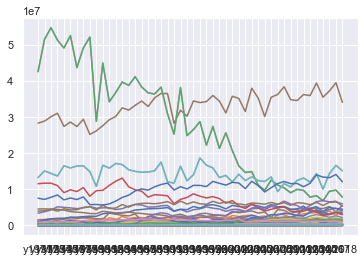

In [139]:
plt.plot(dataCropsTransposed)

#### 5.1.5 Plotting **dataCropsTransposed**

In [140]:
dataCropsTransposed.columns

Index(['Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Asparagus',
       'Barley', 'Beans, dry', 'Beans, green', 'Berries nes', 'Blueberries',
       'Broad beans, horse beans, dry', 'Buckwheat',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cauliflowers and broccoli', 'Cereals nes', 'Cereals, Total',
       'Cherries', 'Cherries, sour', 'Chestnut', 'Chicory roots',
       'Chillies and peppers, green', 'Cucumbers and gherkins', 'Currants',
       'Fibre Crops Primary', 'Flax fibre and tow', 'Fruit Primary',
       'Fruit, fresh nes', 'Fruit, stone nes', 'Garlic', 'Gooseberries',
       'Grain, mixed', 'Grapes', 'Hazelnuts, with shell', 'Hemp tow waste',
       'Hempseed', 'Hops', 'Leeks, other alliaceous vegetables',
       'Lettuce and chicory', 'Linseed', 'Lupins', 'Maize', 'Maize, green',
       'Millet', 'Mushrooms and truffles', 'Nuts nes', 'Oats', 'Oilcrops',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent', 'Oilseeds nes',
     

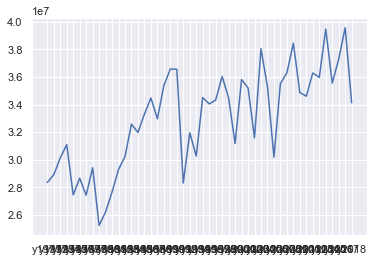

In [141]:
#Plotting cereals
plt.plot(dataCropsTransposed["Cereals, Total"])

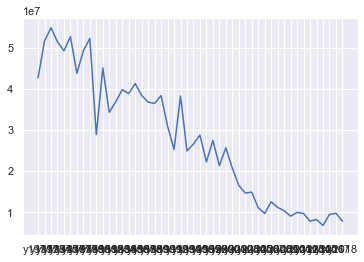

In [142]:
#Ploting "Roots and Tubers, Total"
plt.plot(dataCropsTransposed["Roots and Tubers, Total"])

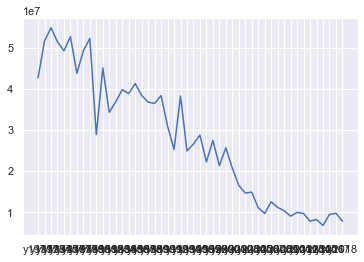

In [143]:
#Plotting "Potatoes"
plt.plot(dataCropsTransposed["Potatoes"])

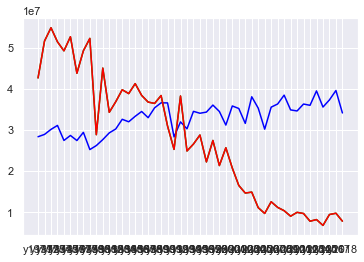

In [144]:
# Plotting the three together
plt.plot(dataCropsTransposed["Cereals, Total"], color = 'blue')
plt.plot(dataCropsTransposed["Roots and Tubers, Total"], color = "green")
plt.plot(dataCropsTransposed["Potatoes"], color = 'red')

### 5.2 GHG emission data collection procedure

The datasets of Nitrous Oxide (N2O), Methane (CH4) and Carbon dioxide (CO2), were gathered from the *databank.worldbank.org*. Those datasets were filtered using the the tools provided by the website itself to include only Poland from the period from 1971 to 2019.

#### 5.2.1 Loading the dataset

In [167]:
# Loading Nitrous Oxide (N2O) dataset
data_nitrox = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1971-nitrous-TRANSPOSED-Poland.csv", index_col=None)

#### 5.2.2 Describing the N20 dataset

In [168]:
data_nitrox.columns

Index(['Year', 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)'], dtype='object')

In [71]:
vars_ghg_charact = ([["Variable", "Description", "Type", "Level"],
                     ["Series Name", "Nitrous Oxide", "String", "Nominal"],
                     ["Series Code", "Code of the series", "String", "Nominal"],
                     ["Country Name", "Poland", "String", "Nominal"],
                     ["Country Code", "POL", "String", "Nominal"],
                     ["Year", "From 1971 to 2019", "Float", "Ratio"]])

In [169]:
print(tabulate(vars_ghg_charact, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════════╤════════╤═════════╕
│ Variable     │ Description        │ Type   │ Level   │
╞══════════════╪════════════════════╪════════╪═════════╡
│ Series Name  │ Nitrous Oxide      │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Series Code  │ Code of the series │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Country Name │ Poland             │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Country Code │ POL                │ String │ Nominal │
├──────────────┼────────────────────┼────────┼─────────┤
│ Year         │ From 1971 to 2019  │ Float  │ Ratio   │
╘══════════════╧════════════════════╧════════╧═════════╛


In [170]:
data_nitrox.describe()

,Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
count,48.00
mean,"30,026.39"
std,"8,996.23"
min,"20,500.00"
25%,"23,230.00"
50%,"24,595.00"
75%,"38,085.51"
max,"46,495.35"


#### 5.2.3 Preparing **data_nitrox** dataset for plotting

#### 5.2.4 Plotting **data_nitrox**

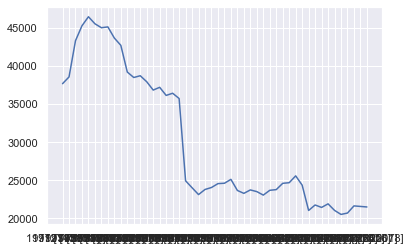

In [171]:
plt.plot(data_nitrox["Year"], data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"])

## 6. Data analysis

To analyze the data, it was required to create a correlation analysis.

#### 6.1 Cereals vs N2O

##### 6.1.1 Scatter plot N2O vs Cereals

In [154]:
y = data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]
x1 = dataCropsTransposed["Cereals, Total"]

In [172]:
data_nitrox["Nitrous oxide emissions (thousand metric tons of CO2 equivalent)"]

0    37,691.04
1    38,576.71
2    43,345.13
3    45,306.19
4    46,495.35
5    45,570.62
6    45,052.30
7    45,157.70
8    43,692.33
9    42,734.12
10   39,221.51
11   38,505.41
12   38,738.53
13   37,945.55
14   36,851.87
15   37,214.88
16   36,149.10
17   36,435.54
18   35,743.00
19   24,920.00
20   24,010.00
21   23,110.00
22   23,780.00
23   24,040.00
24   24,550.00
25   24,600.00
26   25,110.00
27   23,650.00
28   23,270.00
29   23,720.00
30   23,500.00
31   23,040.00
32   23,670.00
33   23,760.00
34   24,590.00
35   24,670.00
36   25,570.00
37   24,350.00
38   21,020.00
39   21,740.00
40   21,420.00
41   21,890.00
42   21,030.00
43   20,500.00
44   20,680.00
45   21,620.00
46   21,550.00
47   21,480.00
Name: Nitrous oxide emissions (thousand metric tons of CO2 equivalent), dtype: float64

In [166]:
dataCropsTransposed["Cereals, Total"]

y1971   28,346,210.00
y1972   28,911,646.00
y1973   30,132,506.00
y1974   31,093,909.00
y1975   27,446,629.00
y1976   28,658,665.00
y1977   27,424,996.00
y1978   29,416,690.00
y1979   25,234,198.00
y1980   26,205,947.00
y1981   27,652,185.00
y1982   29,286,687.00
y1983   30,231,578.00
y1984   32,581,375.00
y1985   31,975,403.00
y1986   33,303,737.00
y1987   34,473,651.00
y1988   32,972,378.00
y1989   35,366,606.00
y1990   36,577,197.00
y1991   36,559,688.00
y1992   28,307,266.00
y1993   31,950,781.00
y1994   30,270,087.00
y1995   34,506,752.00
y1996   34,046,935.00
y1997   34,327,440.00
y1998   36,033,151.00
y1999   34,481,217.00
y2000   31,179,589.00
y2001   35,811,818.00
y2002   35,203,080.00
y2003   31,582,668.00
y2004   38,047,796.00
y2005   35,289,159.00
y2006   30,183,042.00
y2007   35,528,166.00
y2008   36,295,275.00
y2009   38,443,994.00
y2010   34,860,982.00
y2011   34,604,733.00
y2012   36,285,230.00
y2013   35,972,650.00
y2014   39,473,069.00
y2015   35,551,856.00
y2016   37

C:\Users\USER\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


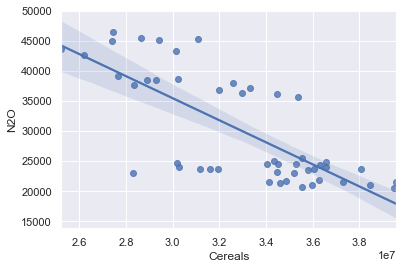

In [173]:
sns.regplot(x1, y)
plt.xlabel("Cereals")
plt.ylabel("N2O")
plt.show()

##### 6.1.2 Regression itself N2O vs Cereals

In [174]:
X = sm.add_constant(x1)
results_cereals = sm.OLS(y,X).fit()
results_cereals.summary()

ValueError: The indices for endog and exog are not aligned

## Subseting Poland

#### Subseting Poland from the global dataset and then transforming the "dt" column into a Python Date time object.

In [152]:
data_poland = global_data[global_data["Country"]=="Poland"].copy()
data_poland["dt"] = pd.to_datetime(data_poland["dt"])

NameError: name 'global_data' is not defined

*Checking the amount of NAN in the data set*

In [ ]:
data_poland.isna().sum()

dt                                0
AverageTemperature               73
AverageTemperatureUncertainty    73
Country                           0
dtype: int64

*deleting the NAN in the dataset*

In [ ]:
data_poland = data_poland.dropna()

In [ ]:
data_poland.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

*Grouping data by year*

In [ ]:
annual_mean_Poland = data_poland.groupby(data_poland["dt"].dt.year).mean()
annual_mean_Poland

,AverageTemperature,AverageTemperatureUncertainty
dt,,
1743,3.937000,2.057000
1744,9.321125,2.025375
1745,-0.971750,1.790500
1750,8.344818,2.028636
1751,8.283625,1.974625
...,...,...
2009,8.652917,0.232667
2010,7.621417,0.221750
2011,8.951667,0.269667


*Reference mean temperature of the 1951-1980 period to establish the global base mean temperature. This is standard practice in climate science.*

In [ ]:
reference_temperature_poland = annual_mean_Poland.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_Poland["Anomaly"] = annual_mean_Poland["AverageTemperature"] - reference_temperature_poland

### Plotting

In [ ]:
annual_mean_Poland

,AverageTemperature,AverageTemperatureUncertainty,Anomaly
dt,,,
1743,3.937000,2.057000,-3.637175
1744,9.321125,2.025375,1.746950
1745,-0.971750,1.790500,-8.545925
1750,8.344818,2.028636,0.770643
1751,8.283625,1.974625,0.709450
...,...,...,...
2009,8.652917,0.232667,1.078742
2010,7.621417,0.221750,0.047242
2011,8.951667,0.269667,1.377492


In [ ]:
y = annual_mean_Poland["AverageTemperature"]
y_mean = [np.mean]

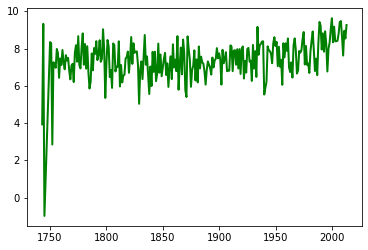

In [ ]:
plt.plot(annual_mean_Poland["AverageTemperature"],
         color = "green",
         linewidth = 2,
         markersize = 12)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d5c3020a0>,
 'caps': [<matplotlib.lines.Line2D at 0x15d5c302760>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d5c2b3d00>,
 'medians': [<matplotlib.lines.Line2D at 0x15d5c302e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x15d5c30e1c0>,
 'means': []}

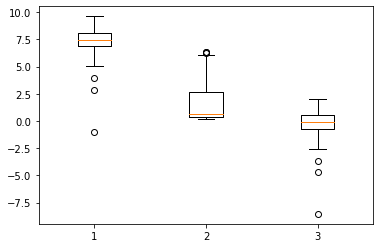

In [ ]:
plt.boxplot(annual_mean_Poland)

(array([  1.,   0.,   0.,   1.,   1.,   2.,  29., 105., 103.,  25.]),
 array([-0.97175   ,  0.08764167,  1.14703333,  2.206425  ,  3.26581667,
         4.32520833,  5.3846    ,  6.44399167,  7.50338333,  8.562775  ,
         9.62216667]),
 <BarContainer object of 10 artists>)

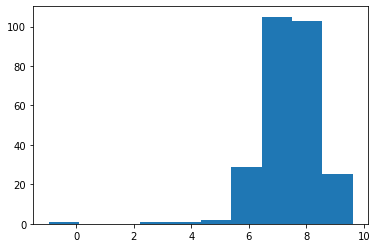

In [ ]:
plt.hist(annual_mean_Poland["AverageTemperature"])

<AxesSubplot:xlabel='Anomaly', ylabel='AverageTemperature'>

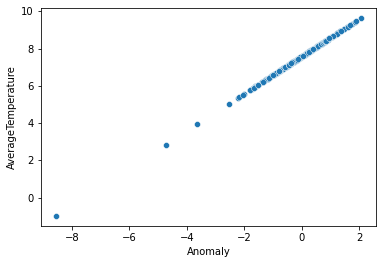

In [ ]:
sns.scatterplot(x="Anomaly", y= "AverageTemperature", data = annual_mean_Poland)